In [4]:
import random
import torch
from matplotlib import pyplot as plt
from d2l import torch as d2l

生成线性回归数据库：选定参数`w`和`b`，然后加入正态样本的误差。

In [5]:
def synthetic_data(w: torch.Tensor, b: torch.Tensor, num_examples, sigma=0.01):
    # x is a row vector
    x = torch.normal(0, 1, (num_examples, len(w)))
    y = x @ w + b
    y += torch.normal(0, sigma, y.shape)
    return x, y.reshape((-1, 1))

In [6]:
true_w = torch.tensor([1, -3.5])
true_b = torch.tensor(4.2)
features, labels = synthetic_data(true_w, true_b, 1000)
features[0], labels[0]

(tensor([0.4751, 0.9834]), tensor([1.2234]))

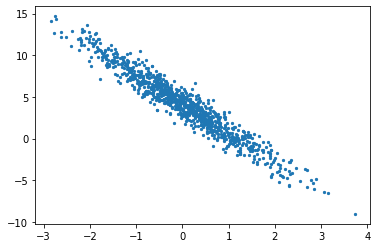

In [7]:
plt.scatter(features[:, 1].numpy(), labels.numpy(), s=5)

In [8]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # 随机排列顺序
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [9]:
# 测试
batch_size = 10
for x, y in data_iter(batch_size, features, labels):
    print(x, '\n', y); break

tensor([[ 1.2354, -0.0045],
        [-1.2150, -0.5078],
        [ 1.1560, -0.0287],
        [ 1.0931, -0.5244],
        [-1.4498,  0.0034],
        [ 0.6576, -0.5466],
        [ 1.5651, -2.0138],
        [-0.6702, -1.0631],
        [-1.2819,  0.0716],
        [-1.2278, -0.7921]]) 
 tensor([[ 5.4509],
        [ 4.7561],
        [ 5.4520],
        [ 7.1113],
        [ 2.7327],
        [ 6.7924],
        [12.8335],
        [ 7.2719],
        [ 2.6508],
        [ 5.7459]])


In [11]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [14]:
# Define the model
def linreg(x: torch.Tensor, w: torch.Tensor, b: torch.Tensor) -> torch.Tensor:
    return x @ w + b

def squared_loss(y_hat: torch.Tensor, y: torch.Tensor) -> torch.Tensor:
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

def SGD(params, eta, batch_size):
    with torch.no_grad():
        for param in params:
            param -= eta / batch_size * param.grad
            param.grad.zero_()

In [15]:
eta = 0.03
epochs = 3
net = linreg
loss = squared_loss

for epoch in range(epochs):
    for x, y in data_iter(batch_size, features, labels):
        l = loss(net(x, w, b), y)
        l.sum().backward()
        SGD([w, b], eta, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch}, loss {float(train_l.mean())}')

epoch 0, loss 0.2188323587179184
epoch 1, loss 0.0006116019794717431
epoch 2, loss 5.1186481869081035e-05


In [16]:
w, true_w, b, true_b

(tensor([[ 0.9993],
         [-3.4992]], requires_grad=True),
 tensor([ 1.0000, -3.5000]),
 tensor([4.1979], requires_grad=True),
 tensor(4.2000))